In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import ast


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
#uploading movies datas
df = pd.read_csv("movies_metadata.csv")
df1= pd.read_csv("ratings.csv")
df2= pd.read_csv("links.csv")

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

# Explain the columns  

Adult       - Is the movie suitable for adults                             
Belongs_to_collection  - Is the movie from a series          
budget      - How much money the movie can use                 
genres      -The genre of the movie, Action, Comedy ,Thriller etc                
homepage    -Movie website                             
id          -Movie identification number                     
imdb_id   -adrees in app               
original_language -Original language of the movie            
original_title    -The name of the movie                     
overview          -Summary                                   
popularity         -How much the movie sells                              
poster_path        -The movie poster                          
production_companies   -The companies that participated in making the movie   
production_countries     -The countries where the movie was created  
release_date        -Date of movie release                   
revenue              -How much money was made from the movie        
runtime              -How long the movie                      
spoken_languages    -Movie languages                        
status  -status
tagline       -punch line   
titel -The name of the film
vido-if there is a vido
vote average- Average votes total
vote count - How many people voted

In [4]:
#for me to know the data better
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
# size fo the df
df.shape

(45466, 24)

In [6]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

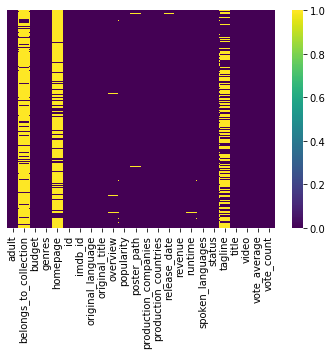

In [7]:
# A graph that describes the values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [8]:
#I decided to drop the following columns because I saw that the missing values in the columns are high.
df.drop(columns = ['tagline','homepage','belongs_to_collection'], inplace =True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
adult                   45466 non-null object
budget                  45466 non-null object
genres                  45466 non-null object
id                      45466 non-null object
imdb_id                 45449 non-null object
original_language       45455 non-null object
original_title          45466 non-null object
overview                44512 non-null object
popularity              45461 non-null object
poster_path             45080 non-null object
production_companies    45463 non-null object
production_countries    45463 non-null object
release_date            45379 non-null object
revenue                 45460 non-null float64
runtime                 45203 non-null float64
spoken_languages        45460 non-null object
status                  45379 non-null object
title                   45460 non-null object
video                   45460 non-null object
vote_average   

#####  fill missing values 

In [10]:
#fill the nan values with 'not information'
df["overview"].fillna("Not overview", inplace = True)
df["poster_path"].fillna("Not poster path", inplace = True)

In [11]:
#I decided to delet the row with the nall value in this coulmn
#becouse The ratio of missing values to the number of columns is minimal
df=df.dropna(axis=0, subset=["imdb_id"])

##### I decided to put in original_language׳s nan  the maximum value that gives the most popular source language.
First of all I checked out what is the most popular value among the original languages, I noticed that English is the original language in the gap on the other languages.
So I decided to take the English language and replace it with the other languages that are missing because of the miniscule attitude the change will not be noticeable.

In [12]:
#I decided to put in 'original_language׳s' nan the maximum value that gives the most popular source language.
df["status"].value_counts()

Released           44999
Rumored              228
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [13]:
df["status"].fillna("Released", inplace = True)

In [14]:
#I decided to put in 'original_language׳s' nan the maximum value that gives the most popular source language.
df['original_language'].value_counts()

en      32256
fr       2437
it       1529
ja       1349
de       1080
        ...  
82.0        1
uz          1
68.0        1
fy          1
eo          1
Name: original_language, Length: 92, dtype: int64

In [15]:
df["original_language"].fillna("en", inplace = True)

In [16]:
#I decided to put in 'production_countries' nan the maximum value that gives the most popular source language.
df['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                                                        17848
[]                                                                                                                                                                                                                                 6274
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                                                                   2237
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                                                                                           1652
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                 

In [17]:
df["production_countries"].fillna("[{'iso_3166_1': 'US', 'name': 'United States of America'}]", inplace = True)

In [18]:
#I decided to put in 'spoken_languages' nan the maximum value that gives the most popular source language.
df['spoken_languages'].value_counts()

[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                   22392
[]                                                                                                                                                                                                          3822
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                                                   1852
[{'iso_639_1': 'ja', 'name': '日本語'}]                                                                                                                                                                        1288
[{'iso_639_1': 'it', 'name': 'Italiano'}]                                                                                                                           

In [19]:
df["spoken_languages"].fillna("en", inplace = True)

In [20]:
#I decided to put in 'production_companies' nan the maximum value that gives the most popular source language.
df['production_companies'].value_counts()

[]                                                                                                                                11865
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                                                 742
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                              540
[{'name': 'Paramount Pictures', 'id': 4}]                                                                                           505
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                                                                     439
                                                                                                                                  ...  
[{'name': 'Lea Film', 'id': 4915}]                                                                                                    1
[{'name': 'Jet Tone Production', 'id': 540}, {'n

In [21]:
# I decided to delete the column because I noticed that a quarter of the values are empty
df.drop(columns = ['production_companies'], inplace =True)

In [22]:
#Convert popularity type object to float
df['popularity'] = df['popularity'].str.isnumeric().astype(float)

In [23]:
#df.info()

In [24]:
# I decided to fill the nan values with the mean of the coulmn
meanP= df["popularity"].mean()
meanR= df["runtime"].mean()
meanVA= df['vote_average'].mean()
meanVC= df['vote_count'].mean()

In [25]:
meanR

94.13589891121536

In [26]:
df["runtime"].fillna(meanR, inplace = True)
df["popularity"].fillna(meanP, inplace = True)
df["vote_average"].fillna(meanVA, inplace = True)
df["vote_count"].fillna(meanVC, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45449 entries, 0 to 45465
Data columns (total 20 columns):
adult                   45449 non-null object
budget                  45449 non-null object
genres                  45449 non-null object
id                      45449 non-null object
imdb_id                 45449 non-null object
original_language       45449 non-null object
original_title          45449 non-null object
overview                45449 non-null object
popularity              45449 non-null float64
poster_path             45449 non-null object
production_countries    45449 non-null object
release_date            45365 non-null object
revenue                 45443 non-null float64
runtime                 45449 non-null float64
spoken_languages        45449 non-null object
status                  45449 non-null object
title                   45443 non-null object
video                   45443 non-null object
vote_average            45449 non-null float64
vote_count   

In [28]:
#I decided to fill the nan values with the max values
df['video'].value_counts()

False    45350
True        93
Name: video, dtype: int64

In [29]:
df["video"].fillna("False", inplace = True)

In [30]:
#if we look closer at the DF we can see that those 2 values look quite the same
df['title'].fillna(df['original_title'], inplace=True)

In [31]:
#I decided to dalet the row with nan values becouse -
#this  it is significant to the model and the number of missing values is minimal
df = df.dropna(axis=0, subset=['revenue'])

In [32]:
#The date is affects the classification so I need everyone to be classified into the date,
# I noticed that these are 81 missing values so I decided to delete them from the data
df = df.dropna(axis=0, subset=['release_date'])

In [33]:
df.isnull().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [34]:
df.shape

(45362, 20)

# work to merge the 3 data togeter

In [35]:
# work on the df1 data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [36]:
df1.shape

(26024289, 4)

In [37]:
df1.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [38]:
#groupby all the row that have the same movieId and get the mean fo them
df1=df1.groupby(["movieId"]).mean()

In [39]:
#Creating an index column
df1=df1.reset_index()

In [40]:
df1.head()

,movieId,userId,rating,timestamp
0,1,135121.043616,3.888157,1.113440e+09
1,2,134877.953761,3.236953,1.088621e+09
2,3,136520.452733,3.175550,9.661124e+08
3,4,136249.536062,2.875713,9.390243e+08
4,5,135293.275855,3.079565,9.896788e+08


In [41]:
# work on the df2 data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
movieId    45843 non-null int64
imdbId     45843 non-null int64
tmdbId     45624 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [42]:
# Create new date by merge two date together 
df5=pd.merge(df1, df2, on='movieId', how='inner')

In [43]:
df5.head()

,movieId,userId,rating,timestamp,imdbId,tmdbId
0,1,135121.043616,3.888157,1.113440e+09,114709,862.0
1,2,134877.953761,3.236953,1.088621e+09,113497,8844.0
2,3,136520.452733,3.175550,9.661124e+08,113228,15602.0
3,4,136249.536062,2.875713,9.390243e+08,114885,31357.0
4,5,135293.275855,3.079565,9.896788e+08,113041,11862.0


In [44]:
df5.isnull().sum()

movieId        0
userId         0
rating         0
timestamp      0
imdbId         0
tmdbId       213
dtype: int64

In [45]:
#dropthe row with nan
df5 = df5.dropna(axis=0, subset=['tmdbId'])

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44902 entries, 0 to 45114
Data columns (total 6 columns):
movieId      44902 non-null int64
userId       44902 non-null float64
rating       44902 non-null float64
timestamp    44902 non-null float64
imdbId       44902 non-null int64
tmdbId       44902 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.4 MB


In [47]:
df5['tmdbId']= df5['tmdbId'].astype(int)

In [48]:
df5['tmdbId'] = df5['tmdbId'].astype(str)

In [49]:
df5=df5.rename(columns={"tmdbId": "id"})

In [50]:
# i have this coulms in the prime date so i dont need then
df5.drop('timestamp', axis=1, inplace=True)
df5.drop('userId', axis=1, inplace=True)

In [51]:
# create new date
df8=pd.merge(df5, df, on='id', how='inner')

In [52]:
df8.shape

(44704, 23)

In [53]:
df8.head()

,movieId,rating,imdbId,id,adult,budget,genres,imdb_id,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,1,3.888157,114709,862,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,en,Toy Story,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,2,3.236953,113497,8844,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,en,Jumanji,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,3,3.175550,113228,15602,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,en,Grumpier Old Men,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,4,2.875713,114885,31357,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,en,Waiting to Exhale,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,5,3.079565,113041,11862,False,0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,en,Father of the Bride Part II,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


In [54]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44704 entries, 0 to 44703
Data columns (total 23 columns):
movieId                 44704 non-null int64
rating                  44704 non-null float64
imdbId                  44704 non-null int64
id                      44704 non-null object
adult                   44704 non-null object
budget                  44704 non-null object
genres                  44704 non-null object
imdb_id                 44704 non-null object
original_language       44704 non-null object
original_title          44704 non-null object
overview                44704 non-null object
popularity              44704 non-null float64
poster_path             44704 non-null object
production_countries    44704 non-null object
release_date            44704 non-null object
revenue                 44704 non-null float64
runtime                 44704 non-null float64
spoken_languages        44704 non-null object
status                  44704 non-null object
title          

In [55]:
df8['rating']=df8['rating'].round(0)

In [56]:
# Convert object to numbers
df8['adult'] = df8['adult'].map({     
        'False': 0,
        'True': 1         
})
df8['video'] = df8['video'].map({     
        'False': 0,
        'True': 1         
})

df8['poster_path']=df8['poster_path'].map({
    'Not poster path':0,
    
})

df8['original_language']=df8['original_language'].map({
    'en':0,
    'fr':1,
    'it':2,
    'ja':3,
    'de':4,
    
})
df8['status']=df8['status'].map({
    'Released':0,
    'Rumored':1,
    'Post Production':2,
    'In Production':3,
    'Planned':4,
    'Canceled':5
})   


In [57]:
#I decided to take these columns and calculate them by the number of letters
df8['title'] = df8['title'].str.len()
df8['original_title'] = df8['original_title'].str.len()
df8['overview'] = df8['overview'].str.len()

In [58]:
#fill other
df8['poster_path'].fillna(value=1, inplace=True)
df8['original_language'].fillna(value=5, inplace=True)
df8['video'].fillna(value=2, inplace=True)

In [59]:
#use only the year
df8['release_date'] = pd.DatetimeIndex(df8['release_date']).year

In [60]:
#this coulms dont tell me a "story"
df8.drop('id', axis=1, inplace=True)
df8.drop('movieId', axis=1, inplace=True)

In [61]:
df8['production_countries'].value_counts

<bound method IndexOpsMixin.value_counts of 0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
44699    [{'iso_3166_1': 'US', 'name': 'United States o...
44700    [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
44701        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
44702    [{'iso_3166_1': 'US', 'name': 'United States o...
44703             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
Name: production_countries, Length: 44704, dtype: object>

In [62]:
#A function that convert object to float
def st_to_fl(se):
    try:
        return float(se)
    except:
        a=se.split(".")[0]
        return a

In [63]:
se=df8['budget']
df8['budget']=se.apply(lambda x:st_to_fl(x))

se=df8['vote_average']
df8['vote_average']=se.apply(lambda x:st_to_fl(x))

se=df8['vote_count']
df8['vote_count']=se.apply(lambda x:st_to_fl(x))


In [64]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44704 entries, 0 to 44703
Data columns (total 21 columns):
rating                  44704 non-null float64
imdbId                  44704 non-null int64
adult                   44704 non-null int64
budget                  44704 non-null float64
genres                  44704 non-null object
imdb_id                 44704 non-null object
original_language       44704 non-null float64
original_title          44704 non-null int64
overview                44704 non-null int64
popularity              44704 non-null float64
poster_path             44704 non-null float64
production_countries    44704 non-null object
release_date            44704 non-null int64
revenue                 44704 non-null float64
runtime                 44704 non-null float64
spoken_languages        44704 non-null object
status                  44704 non-null int64
title                   44704 non-null int64
video                   44704 non-null float64
vote_average    

In [65]:
#A function that gives me just the first word afther 'mane'
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data_str = ast.literal_eval(data_str)
        if isinstance(data_str, list):
            for k_v in data_str:
                values.append(k_v['name'])
            return values
        else:
            return None

In [66]:
df8[['genres']] = df8[['genres']].applymap(get_values)
df8[['production_countries']] = df8[['production_countries']].applymap(get_values)

In [67]:
df8.head()

,rating,imdbId,adult,budget,genres,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,4.0,114709,0,30000000.0,"[Animation, Comedy, Family]",tt0114709,0.0,9,303,0.0,...,[United States of America],1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,9,2.0,7.7,5415.0
1,3.0,113497,0,65000000.0,"[Adventure, Fantasy, Family]",tt0113497,0.0,7,395,0.0,...,[United States of America],1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",0,7,2.0,6.9,2413.0
2,3.0,113228,0,0.0,"[Romance, Comedy]",tt0113228,0.0,16,327,0.0,...,[United States of America],1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,16,2.0,6.5,92.0
3,3.0,114885,0,16000000.0,"[Comedy, Drama, Romance]",tt0114885,0.0,17,270,0.0,...,[United States of America],1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,17,2.0,6.1,34.0
4,3.0,113041,0,0.0,[Comedy],tt0113041,0.0,27,318,0.0,...,[United States of America],1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",0,27,2.0,5.7,173.0


In [68]:
#convert to type string
df8['genres'] = df8['genres'].astype(str)
df8["production_countries"] = df8["production_countries"].astype(str)

In [69]:
df8['genres']=df8['genres'].map({
    'Drama':1,
    'Comedy':2,
    'Documentary':3,
    'Romance':4,
    'Family':5,
    'Science Fiction':6,
    'History':7,
    'Animation':8,
    'TV Movie':9,
    'Adventure':10
    
})  

df8['production_countries']=df8['production_countries'].map({
    'United States of America':1,
    'United Kingdom':2,
    'France':3,
    'Japan':4,
    'Italy':5,
    'Canada':6,
    'Germany':7,
    'India':8,
    'Russia':9,
})  


In [70]:
df8['genres'].fillna(value=11, inplace=True)
df8['production_countries'].fillna(value=10, inplace=True)

In [71]:
#drop this colums
df8.drop('spoken_languages', axis=1, inplace=True)
df8.drop('imdb_id', axis=1, inplace=True)

# stage 4 - model


###### Logistic Regression

In [72]:
df8['rating'].value_counts()

3.0    21548
4.0    13462
2.0     7932
1.0      906
0.0      467
5.0      389
Name: rating, dtype: int64

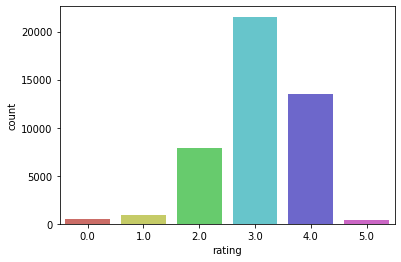

In [73]:
x=df8['rating']
sns.countplot(x,data=df8,palette='hls')
plt.show()

In [74]:
#6 Categories
X=df8.drop('rating',axis=1)
y=df8['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

predictions=lr.predict(X_test)

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       163
         1.0       0.00      0.00      0.00       278
         2.0       0.00      0.00      0.00      2604
         3.0       0.48      1.00      0.65      7142
         4.0       0.49      0.01      0.02      4442
         5.0       0.00      0.00      0.00       124

    accuracy                           0.48     14753
   macro avg       0.16      0.17      0.11     14753
weighted avg       0.38      0.48      0.32     14753



/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
confusion_matrix(y_test, predictions)

array([[   0,    0,    0,  163,    0,    0],
       [   0,    0,    0,  278,    0,    0],
       [   0,    0,    0, 2595,    9,    0],
       [   0,    0,    0, 7110,   32,    0],
       [   0,    0,    0, 4401,   41,    0],
       [   0,    0,    0,  123,    1,    0]])

In [78]:
print(metrics.accuracy_score(y_test,predictions))

0.4847149732257846


In [79]:
#Because there is not enough information to build the model, I decided to divide the prediction into three

In [80]:
df8["rating1"] = df8['rating']

In [81]:
df8['rating1'] = df8['rating1'].astype(str)

In [82]:
df8['rating1']=df8['rating1'].map({
   '5.0':3,
    '4.0':3,
    '3.0':2,
    '2.0':2,
    '1.0':1,
    '0.0':1
})

In [83]:
df8['rating1'].value_counts()

2    29480
3    13851
1     1373
Name: rating1, dtype: int64

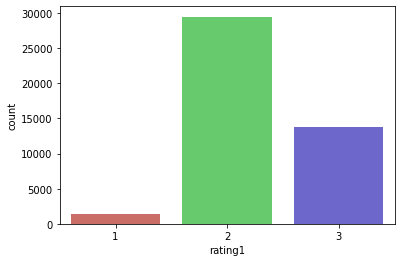

In [84]:
x=df8['rating1']
sns.countplot(x,data=df8,palette='hls')
plt.show()

In [85]:
#3 Categories
X=df8.drop('rating1',axis=1)
y=df8['rating1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#we used the train model to get the prediction for our test data set (X_test)
predictions=lr.predict(X_test)

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       441
           2       0.66      1.00      0.80      9746
           3       0.61      0.01      0.02      4566

    accuracy                           0.66     14753
   macro avg       0.43      0.34      0.27     14753
weighted avg       0.63      0.66      0.53     14753



/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
confusion_matrix(y_test, predictions)

array([[   0,  441,    0],
       [   0, 9724,   22],
       [   0, 4531,   35]])

In [89]:
print(metrics.accuracy_score(y_test,predictions))

0.6614925777807904


In [90]:
#Because there is not enough information to build the model, I decided to divide the prediction into three

In [91]:
df8["rating2"] = df8['rating']

In [92]:
df8['rating2'] = df8['rating2'].astype(str)

In [93]:
df8['rating2']=df8['rating2'].map({
   '5.0':2,
    '4.0':2,
    '3.0':2,
    '2.0':1,
    '1.0':1,
    '0.0':1
})

In [94]:
df8['rating2'].value_counts()

2    35399
1     9305
Name: rating2, dtype: int64

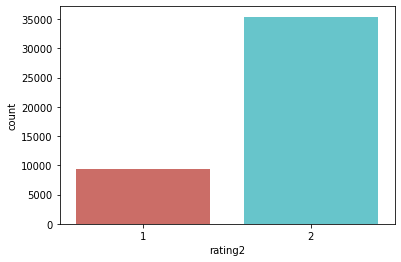

In [95]:
x=df8['rating2']
sns.countplot(x,data=df8,palette='hls')
plt.show()

In [96]:
#2 Categories
X=df8.drop('rating2',axis=1)
y=df8['rating2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#we used the train model to get the prediction for our test data set (X_test)
predictions=lr.predict(X_test)

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3045
           2       0.79      1.00      0.88     11708

    accuracy                           0.79     14753
   macro avg       0.40      0.50      0.44     14753
weighted avg       0.63      0.79      0.70     14753



/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
confusion_matrix(y_test, predictions)

array([[    0,  3045],
       [    0, 11708]])

In [100]:
print(metrics.accuracy_score(y_test,predictions))

0.7936013014302176


#### KNN

In [102]:
#6 Categories
X=df8.drop('rating',axis=1)
y=df8['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
k=KNeighborsClassifier(n_neighbors=30)
k.fit(X_train,y_train)
predictions=k.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       163
         1.0       0.00      0.00      0.00       278
         2.0       0.23      0.03      0.06      2604
         3.0       0.49      0.85      0.63      7142
         4.0       0.34      0.16      0.22      4442
         5.0       0.00      0.00      0.00       124

    accuracy                           0.47     14753
   macro avg       0.18      0.17      0.15     14753
weighted avg       0.38      0.47      0.38     14753



/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
print(confusion_matrix(y_test, predictions))

[[   0    0    7  125   31    0]
 [   0    0    6  230   42    0]
 [   0    0   85 2145  374    0]
 [   0    0  152 6085  905    0]
 [   0    0  110 3624  708    0]
 [   0    0    7  104   13    0]]


In [105]:
print(metrics.accuracy_score(y_test,predictions))

0.4662102623195282


In [106]:
#2 Categories
X=df8.drop('rating2',axis=1)
y=df8['rating2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
k=KNeighborsClassifier(n_neighbors=15)
k.fit(X_train,y_train)
predictions=k.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.27      0.02      0.04      3045
           2       0.79      0.99      0.88     11708

    accuracy                           0.79     14753
   macro avg       0.53      0.50      0.46     14753
weighted avg       0.69      0.79      0.71     14753



In [108]:
print(confusion_matrix(y_test, predictions))

[[   58  2987]
 [  158 11550]]


In [109]:
print(metrics.accuracy_score(y_test,predictions))

0.7868230190469735


#### Naive Bayes

In [110]:
#2 Categories
X=df8.drop('rating2',axis=1)
y=df8['rating2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  

y_pred = gnb.predict(X_test) 


print( metrics.accuracy_score(y_test, y_pred))

0.2886192638785332


In [112]:
confusion_matrix(y_test, y_pred)

array([[ 2878,   167],
       [10328,  1380]])